In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data3.csv")

In [ ]:
df.insert( 0, "x0", 1)

In [ ]:
df

,x0,x,z
0,1,0.1,1.159563
1,1,0.2,1.002381
2,1,0.3,0.935920
3,1,0.4,0.016261
4,1,0.5,1.172652
...,...,...,...
95,1,9.6,2.267108
96,1,9.7,2.351145
97,1,9.8,1.957880
98,1,9.9,1.426106


In [ ]:
def xi(i):
  return np.array((df.iloc[i][:2],)).T

In [ ]:
def xi_t(vector):
  return vector.T

In [ ]:
def yi(i):
  return np.array(df.iloc[i][2:])

In [ ]:
zero_vec = np.zeros((2,1))
zero_matrix = np.zeros((2,2))
for i in range(int(len(df)*0.8)):
  zero_matrix = zero_matrix + (xi(i) @ xi_t(xi(i)))
  zero_vec = zero_vec + (xi(i) * yi(i))

In [ ]:
w = np.linalg.inv(zero_matrix) @ zero_vec
w

array([[1.1442594 ],
       [0.10560192]])

In [ ]:
acc = []
for i in range(len(df)):
  acc.append((w.T @ xi(i))[0][0])



In [ ]:
df["z_cap"] = acc

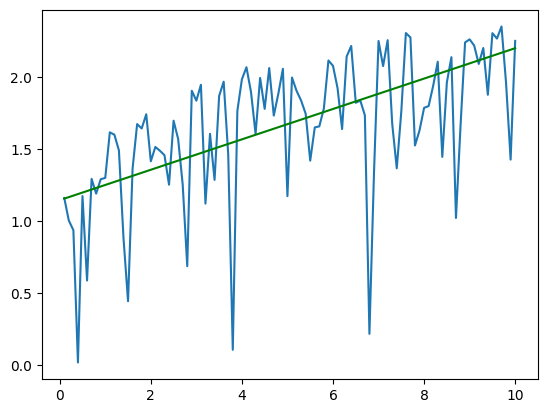

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['x'], df['z'])
plt.plot(df['x'], acc, color = 'green')

In [ ]:
def RSS(df):
  return np.sum((df["z"] - df["z_cap"])**2)

In [ ]:
def TSS(df):
  return np.sum((df["z"] - np.mean(df["z"]))**2)

In [ ]:
R_square = 1 - (RSS(df)/TSS(df))

In [ ]:
R_square

0.3064771410184942

In [ ]:
def RMSE(df):
  return (RSS(df)/len(df))**1/2

In [ ]:
RMSE(df)

0.08171595553314087

In [ ]:
def abs(df):
  return np.sum(np.abs(df["z"] - df["z_cap"]))

In [ ]:
def MAE(df):
  return abs(df)/len(df)


In [ ]:
MAE(df)

0.2912332231973345